Importing Libraries

In [40]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow

Loading Dataset and checking it

In [41]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [42]:
x_train[9]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0, 189, 190,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 143, 247, 153,   0,   0,
          0,   0],
       [  

In [43]:
y_train[2]

4

In [44]:
x_train.shape

(60000, 28, 28)

Scaling of Dataset

In [45]:
x_train=x_train/255
x_test=x_test/255

In [46]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

Making the model with a Single Neuron

In [47]:
from pickletools import optimize


model=keras.Sequential(
    [
        keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
    ]
)


Compiling the model

In [48]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


Training the model

In [49]:
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4690 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3041 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2836 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2733 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2661 - accuracy: 0.9259


In [50]:
loss,accuracy=model.evaluate(x_test_flattened,y_test)
print(f"Accuracy={accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.2682 - accuracy: 0.9256
Accuracy=0.925599992275238


Checking Predictions

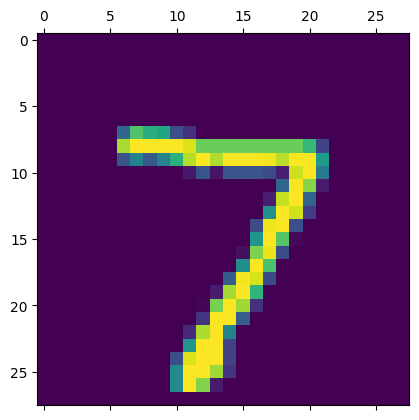

In [51]:
plt.matshow(x_test[0])

In [52]:
y_predict=model.predict(x_test_flattened)
y_predict[0]

313/313 [==============================] - 1s 2ms/step


array([3.7318073e-02, 3.4820744e-07, 4.9529623e-02, 9.5933282e-01,
       1.7456765e-03, 1.3420624e-01, 7.3666644e-07, 9.9968594e-01,
       9.5823526e-02, 6.1749268e-01], dtype=float32)

Labeeling the numbers to classes

In [53]:
np.argmax(y_predict[0])

7

In [54]:
y_predicted_labels=[np.argmax(i) for i in y_predict]

Confusion Matrix of the model

In [55]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    5,    3,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   8,   10,  920,   17,    8,    5,   11,   10,   40,    3],
       [   4,    0,   20,  919,    0,   31,    2,   10,   17,    7],
       [   2,    1,    4,    1,  910,    0,   10,    4,   10,   40],
       [   8,    2,    1,   34,    6,  795,   12,    3,   26,    5],
       [  13,    3,    7,    1,    8,   17,  905,    2,    2,    0],
       [   1,    5,   25,    6,    3,    0,    0,  956,    3,   29],
       [   8,    8,    7,   21,    8,   39,    9,   11,  857,    6],
       [  11,    7,    1,   10,   23,   12,    0,   27,    4,  914]])>

Confusion Matrix Visualisation

TypeError: 'str' object is not callable

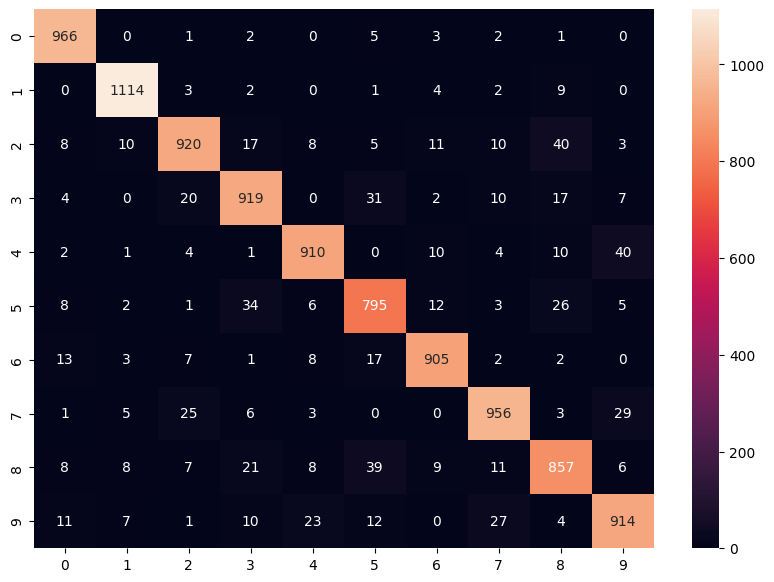

In [56]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Making the model with Two Neurons

In [ ]:
model_dl1=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])


Compiling the model

In [ ]:
model_dl1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Training the model

In [ ]:
model_dl1.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5067 - accuracy: 0.8582
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2959 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2694 - accuracy: 0.9240
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2523 - accuracy: 0.9276
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2393 - accuracy: 0.9314


Accuracy

In [ ]:
loss,accuracy=model_dl1.evaluate(x_test_flattened,y_test)
print(f"Accuracy={accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.2455 - accuracy: 0.9299
Accuracy=0.9298999905586243


Checking Predictions

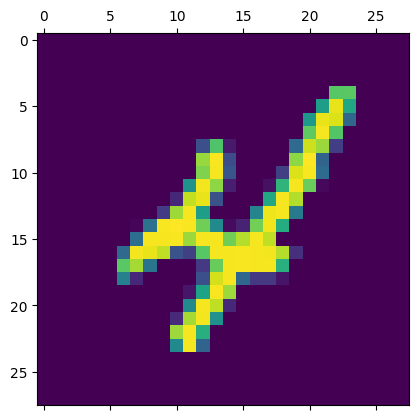

In [ ]:
plt.matshow(x_train[9])

In [ ]:
y_predict_dl1=model_dl1.predict(x_test_flattened)
y_predict_dl1[9]

313/313 [==============================] - 1s 2ms/step


array([3.6067498e-01, 4.5012857e-06, 6.0492240e-02, 9.4628274e-01,
       9.9989486e-01, 7.7216595e-01, 4.2100626e-01, 9.9948674e-01,
       9.9310660e-01, 9.9999559e-01], dtype=float32)

Labelling the numbers to classes

In [ ]:
np.argmax(y_predict_dl1[9])

9

In [ ]:
y_predicted_labels_dl1=[np.argmax(i) for i in y_predicted_labels]

Confusion Matrix

In [ ]:
cm_dl1=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels_dl1)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    6,    6,    3,    2,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   4,   12,  919,   14,   10,    7,   11,   10,   41,    4],
       [   1,    0,   19,  903,    0,   41,    2,   12,   24,    8],
       [   1,    1,    4,    1,  918,    0,   10,    5,   10,   32],
       [   8,    2,    3,   16,   11,  797,   13,    4,   31,    7],
       [  11,    3,    9,    1,    8,   17,  904,    2,    3,    0],
       [   1,    7,   21,    7,    7,    1,    0,  946,    3,   35],
       [   4,   12,    5,   15,    9,   35,    7,   11,  868,    8],
       [  10,    7,    1,    9,   30,    9,    0,   19,    5,  919]])>

Confusion Matrix Visualisation

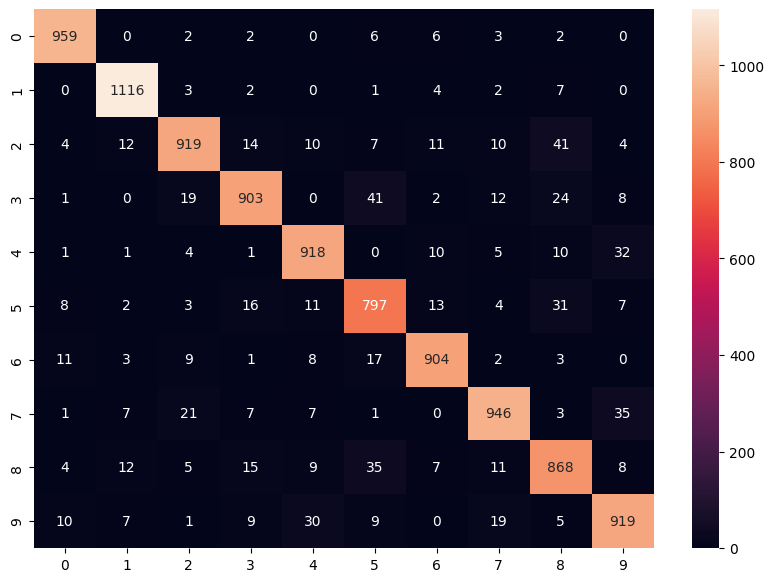

In [ ]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel=('Predicted')
plt.ylabel=('Truth')